# A skeleton of the machine learning pipeline

During the reading of [Practical Statistics for Data Scientists: 50 Essential Concepts](https://www.amazon.com/Practical-Statistics-Data-Scientists-Essential/dp/1491952962) I found it useful to have a skeleton of the machine learning pipeline. The goal is to define a minimal set of steps that are needed to perform classification on a given dataset. I'm going to split this task to a few small posts each focussed on a separated challenge. I'm going to use a loan dataset provided by this book and will go with python with [scikit-learn](https://scikit-learn.org/stable/) v 0.20.3 inside [Jupyter Notebook](https://jupyter.org/).

In this part, I'm going to cover basic things that need to happen before running any machine learning algorithm. So let's start and load our dataset by using *pandas* the standard python approach for dealing with data. 

In [19]:
import pandas as pd
df = pd.read_csv("/Users/mjancy/Documents/statistics_for_data_scientists/psds_data/loan_data.csv")
df.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


Looks like dataset already contains index column inside, just quickly check if it contains unique values.

In [9]:
df[df['Unnamed: 0'].duplicated()].size

0

By knowing that the first column in our dataset is unique and numeric we can simply use it as an index during data read.

In [20]:
df = pd.read_csv("/Users/mjancy/Documents/statistics_for_data_scientists/psds_data/loan_data.csv", index_col=0)
df.head()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


# Categorical variables

First I need to deal with categorical variables so variables which have values different that numbers like `purpose`  which contains a fixed set of named values:

In [21]:
df['purpose'].unique()

array(['car', 'small_business', 'other', 'debt_consolidation',
       'major_purchase', 'credit_card', 'home_improvement', 'moving',
       'house', 'medical', 'wedding', 'vacation'], dtype=object)

By checking types and data behind (df.head ) of each column I can say that  ```object``` columns are ```categorical```one so looks good enough:

In [13]:
df.dtypes

status                object
loan_amnt              int64
term                  object
annual_inc             int64
dti                  float64
payment_inc_ratio    float64
revol_bal              int64
revol_util           float64
purpose               object
home_ownership        object
delinq_2yrs_zero       int64
pub_rec_zero           int64
open_acc               int64
grade                float64
outcome               object
emp_length             int64
purpose_              object
home_                 object
emp_len_              object
borrower_score       float64
dtype: object

A simple way of selecting all categorical columns is by checking them type

In [22]:
import numpy as np

categorical_columns = np.array(df.columns[df.dtypes == object])
numerical_columns = np.array(df.columns[df.dtypes != object])
all_columns = df.columns

I'm going to assign them numbers instead of named values, so let's say [a, b, a, c] named values will map to [1, 2, 1, 3]. To do that I will use LabelEncoder from sklearn.preprocessing package:

In [27]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_categorical_columns = df[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))

# combain categorical columns with numerci ones to get whole dataset once again
df_encoded = pd.concat([df[numerical_columns], df_categorical_columns], axis=1)

# check look and feel of it
df_encoded.head()

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,emp_length,borrower_score,status,term,purpose,home_ownership,outcome,purpose_,home_,emp_len_
1,2500,30000,1.00,2.39320,1687,9.4,1,1,3,4.8,1,0.65,0,1,0,3,0,3,2,1
2,5600,40000,5.55,4.57170,5210,32.6,1,1,11,1.4,5,0.80,0,1,9,2,0,6,1,1
3,5375,15000,18.08,9.71600,9279,36.5,1,1,2,6.0,1,0.60,0,1,8,3,0,5,2,1
4,9000,30000,10.08,12.21520,10452,91.7,1,1,4,4.2,1,0.50,0,0,2,3,0,1,2,1
5,10000,100000,7.06,3.90888,11997,55.5,1,1,14,5.4,4,0.55,0,0,8,3,0,5,2,1


# Multicollinearity

[Multicollinearity](https://www.statisticssolutions.com/multicollinearity/) occurs when the variables are highly correlated to each other and can decrease the precision of regression and classification algorithms. The simplest approach is to just  ```corr``` function from pandas on our dataset:

[Hint]
Good to know is that correlation can't be calculated for categorical variables so dealing with them before was important.

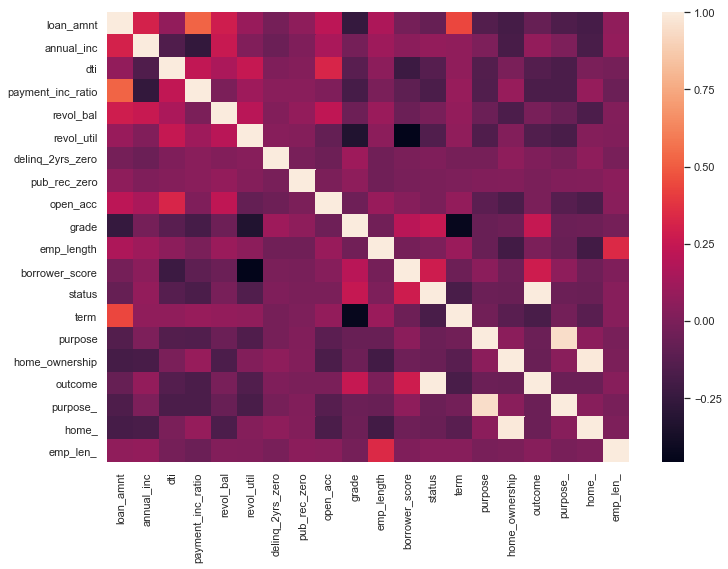

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

corr = df_encoded.corr()
sns.heatmap(corr)

I'm going to investigate correlation only if it's above or below 0.3

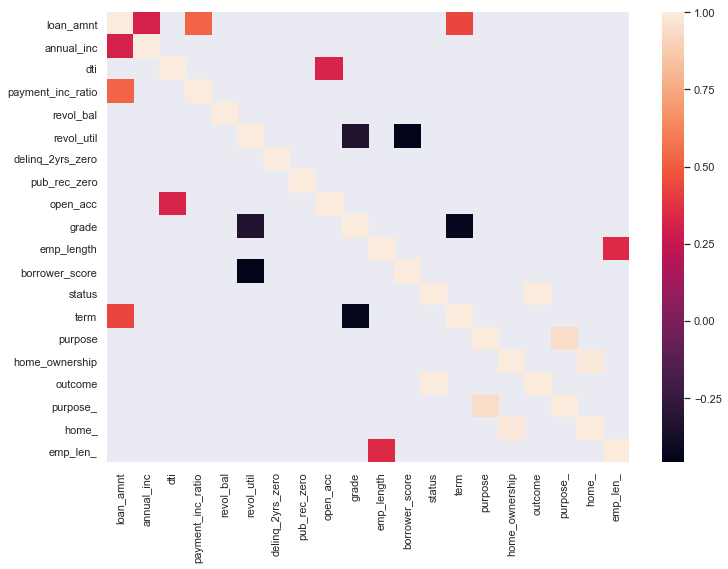

In [38]:
sns.heatmap(corr[(corr.abs() > 0.3)])

Correlation matrix shows which variables are dependent on each other, in the next post I will go through of them one by one and check which contains better information.

# Next

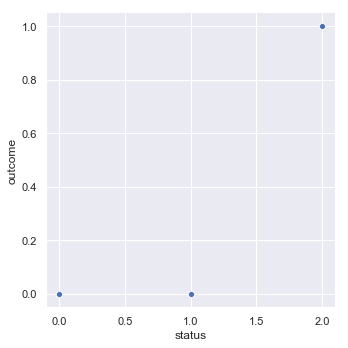

In [47]:
sns.relplot(x='status', y='outcome', data=df_encoded)

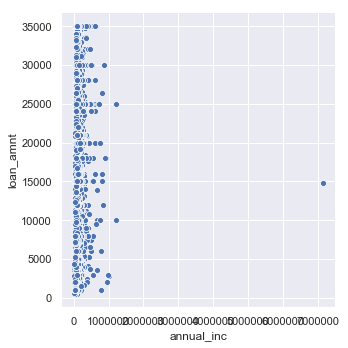

In [50]:
sns.relplot(x='annual_inc', y='loan_amnt', data=df_encoded)

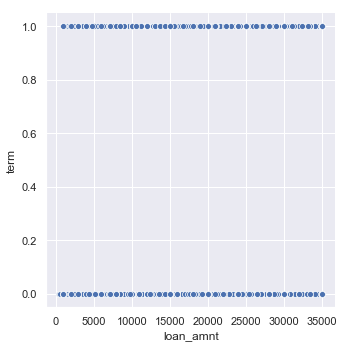

In [51]:
sns.relplot(x='loan_amnt', y='term', data=df_encoded)

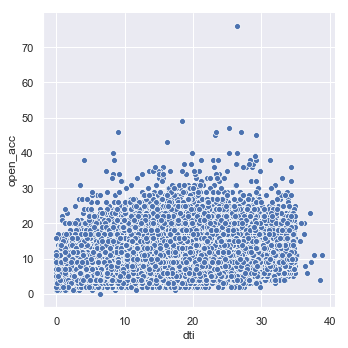

In [52]:
sns.relplot(x='dti', y='open_acc', data=df_encoded)

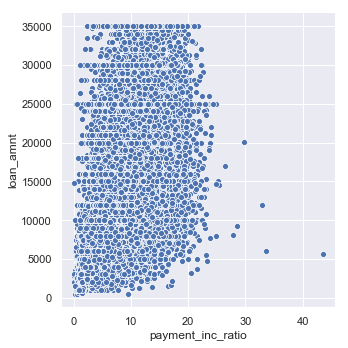

In [53]:
sns.relplot(x='payment_inc_ratio', y='loan_amnt', data=df_encoded)

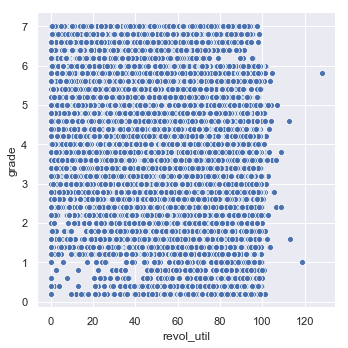

In [54]:
sns.relplot(x='revol_util', y='grade', data=df_encoded)

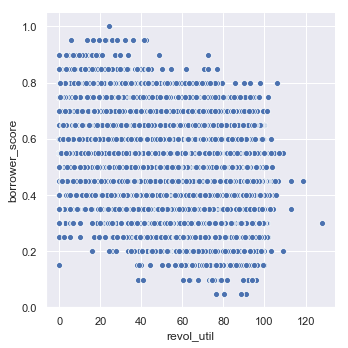

In [55]:
sns.relplot(x='revol_util', y='borrower_score', data=df_encoded)

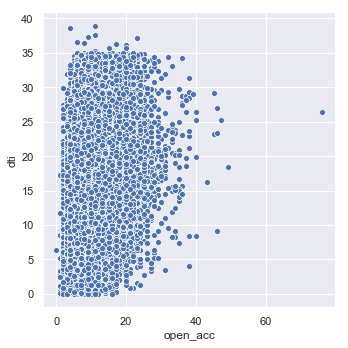

In [56]:
sns.relplot(x='open_acc', y='dti', data=df_encoded)

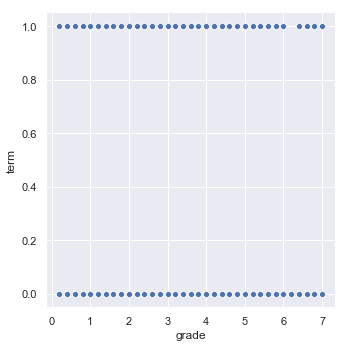

In [57]:
sns.relplot(x='grade', y='term', data=df_encoded)

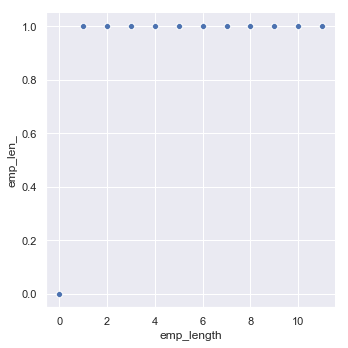

In [58]:
sns.relplot(x='emp_length', y='emp_len_', data=df_encoded)

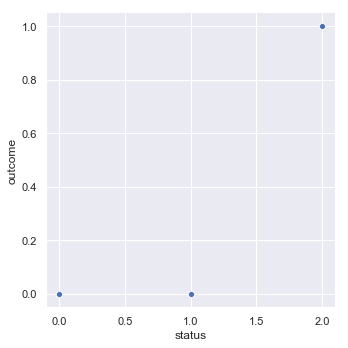

In [59]:
sns.relplot(x='status', y='outcome', data=df_encoded)

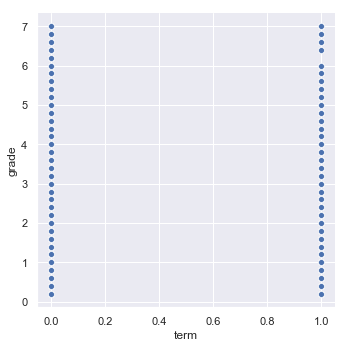

In [60]:
sns.relplot(x='term', y='grade', data=df_encoded)

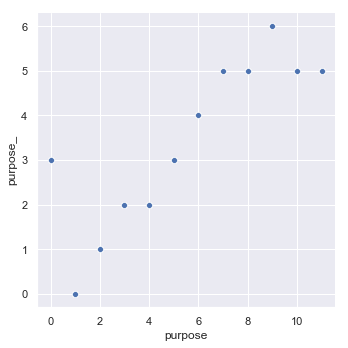

In [61]:
sns.relplot(x='purpose', y='purpose_', data=df_encoded)

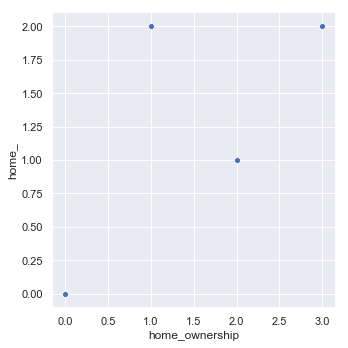

In [62]:
sns.relplot(x='home_ownership', y='home_', data=df_encoded)

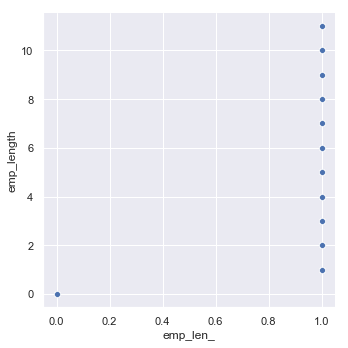

In [49]:
sns.relplot(x='emp_len_', y='emp_length', data=df_encoded)

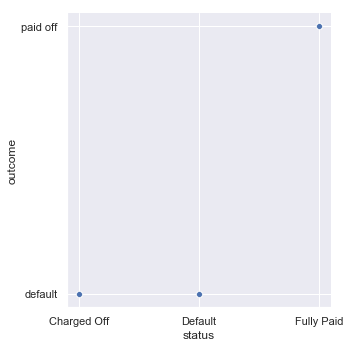

In [156]:
sns.relplot(x='status', y='outcome', data=df)

# Fatures and target (X, y) split

Our challenge is to say if owner of this loan will default of paid off it. This information is in ```outcome``` column so let's assign it to oucome  

In [113]:
X = df.drop(['outcome', 'status'], axis=1)
y = df['outcome']
y.unique()

array(['default', 'paid off'], dtype=object)

# Train test split

In [88]:
RANDOM_STATE = 7 

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)

In [67]:
X_train.describe(include='all')

,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,emp_length,purpose_,home_,emp_len_,borrower_score
count,30379.000000,30379,3.037900e+04,30379.000000,30379.000000,3.037900e+04,30379.000000,30379,30379,30379.000000,30379.000000,30379.000000,30379.00000,30379.000000,30379,30379,30379,30379.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,12,4,NaN,NaN,NaN,NaN,NaN,7,3,2,NaN
top,NaN,36 months,NaN,NaN,NaN,NaN,NaN,debt_consolidation,MORTGAGE,NaN,NaN,NaN,NaN,NaN,debt_consolidation,MORTGAGE,> 1 Year,NaN
freq,NaN,22856,NaN,NaN,NaN,NaN,NaN,17137,14061,NaN,NaN,NaN,NaN,NaN,17137,14061,29203,NaN
mean,13171.964186,NaN,6.832479e+04,16.127758,8.029951,1.484020e+04,56.064996,NaN,NaN,0.856908,0.910958,10.416505,4.59871,6.343329,NaN,NaN,NaN,0.498887
std,8121.298884,NaN,6.087406e+04,7.605448,4.264873,1.867223e+04,25.419678,NaN,NaN,0.350173,0.284809,4.702062,1.48286,3.753284,NaN,NaN,NaN,0.128592
min,500.000000,NaN,3.600000e+03,0.000000,0.048892,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.20000,0.000000,NaN,NaN,NaN,0.050000
25%,7000.000000,NaN,4.200000e+04,10.430000,4.674580,5.663500e+03,37.900000,NaN,NaN,1.000000,1.000000,7.000000,3.60000,3.000000,NaN,NaN,NaN,0.400000
50%,11400.000000,NaN,6.000000e+04,15.940000,7.492150,1.075200e+04,58.400000,NaN,NaN,1.000000,1.000000,10.000000,4.80000,6.000000,NaN,NaN,NaN,0.500000
75%,18000.000000,NaN,8.100000e+04,21.610000,10.918000,1.858150e+04,76.400000,NaN,NaN,1.000000,1.000000,13.000000,5.80000,11.000000,NaN,NaN,NaN,0.600000


In [ ]:
df = df.drop(df.columns[0], axis=1)
df.head()

# Feature pre-processing

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [71]:
columnTransformer = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_columns),
    ('normalizer', Normalizer(norm='l1'), numerical_columns),
    ('impute', SimpleImputer(strategy='mean'), numerical_columns)
])

# Pipleline

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [80]:
pipeline = Pipeline([
    ('pre_processing', columnTransformer),
    #('svm', SVC(kernel='linear'))
    ('randomForestClassifier', RandomForestClassifier(n_estimators=10, max_depth=4, random_state=RANDOM_STATE))
])

# Prediction

In [81]:
clf = pipeline.fit(X_train, y_train)

# Model evaluation

In [82]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [83]:
y_pred = clf.predict(X_test)

In [84]:
confusion_matrix(y_test, y_pred)

array([[4774, 2726],
       [2503, 4960]])